In [ ]:
import http.client
import json
import pandas
import time
from ggplot import *

In [76]:
API_KEY = 'TOKEN'

In [ ]:
# GET RATING FOR MOVIES

uri = "/3/certification/movie/list?api_key={}".format(API_KEY)
conn = http.client.HTTPSConnection("api.themoviedb.org")
payload = "{}"
conn.request("GET", uri, payload)
res = conn.getresponse()
us_certifications = json.loads(res.read().decode('utf-8'))['certifications']['US']

In [107]:
us_certifications[1]

{'certification': 'PG-13',
 'meaning': 'Some material may be inappropriate for children under 13. Films given this rating may contain sexual content, brief or partial nudity, some strong language and innuendo, humor, mature themes, political themes, terror and/or intense action violence. However, bloodshed is rarely present. This is the minimum rating at which drug content is present.',
 'order': 3}

In [ ]:
# GET TOP 25 movies of each rating 
rated_movies = list()
conn = http.client.HTTPSConnection("api.themoviedb.org")
for item in us_certifications:
    payload = "{}"
    certification = item['certification']
    uri = "/3/discover/movie?certification_country=US&certification={}&sort_by=popularity.desc&api_key={}".format(certification, API_KEY)
    conn.request("GET", uri, payload)
    res = conn.getresponse()
    data = json.loads(res.read().decode('utf-8'))
    new_data = list()
    
    for datum in data['results']:
        datum['rating'] = certification
        datum['genre_count'] = len(datum['genre_ids'])
        new_data.append(datum)
        
    rated_movies.extend(data['results'])

In [108]:
rated_movies[1]

{'adult': False,
 'backdrop_path': '/r1xLXJ05bG8hV02No3xNhi8ZcK5.jpg',
 'genre_count': 5,
 'genre_ids': [10749, 10751, 16, 14, 10402],
 'id': 10020,
 'original_language': 'en',
 'original_title': 'Beauty and the Beast',
 'overview': "Follow the adventures of Belle, a bright young woman who finds herself in the castle of a prince who's been turned into a mysterious beast. With the help of the castle's enchanted staff, Belle soon learns the most important lesson of all -- that true beauty comes from within.",
 'popularity': 6.233605,
 'poster_path': '/b9QJr2oblOu1grgOMUZF1xkUJdh.jpg',
 'rating': 'G',
 'release_date': '1991-11-12',
 'title': 'Beauty and the Beast',
 'video': False,
 'vote_average': 7.4,
 'vote_count': 2143}

In [23]:
# GET GENRES FOR MOVIES

uri = "/3/genre/movie/list?api_key={}".format(API_KEY)
conn = http.client.HTTPSConnection("api.themoviedb.org")
payload = "{}"
conn.request("GET", uri, payload)
res = conn.getresponse()
genres = json.loads(res.read().decode('utf-8'))['genres']
genres

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 16, 'name': 'Animation'},
 {'id': 35, 'name': 'Comedy'},
 {'id': 80, 'name': 'Crime'},
 {'id': 99, 'name': 'Documentary'},
 {'id': 18, 'name': 'Drama'},
 {'id': 10751, 'name': 'Family'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 36, 'name': 'History'},
 {'id': 27, 'name': 'Horror'},
 {'id': 10402, 'name': 'Music'},
 {'id': 9648, 'name': 'Mystery'},
 {'id': 10749, 'name': 'Romance'},
 {'id': 878, 'name': 'Science Fiction'},
 {'id': 10770, 'name': 'TV Movie'},
 {'id': 53, 'name': 'Thriller'},
 {'id': 10752, 'name': 'War'},
 {'id': 37, 'name': 'Western'}]

In [ ]:
genred_movies = list()
conn = http.client.HTTPSConnection("api.themoviedb.org")
for item in genres:
    payload = "{}"
    genre = item['id']
    name = item['name']
    uri = "/3/discover/movie?certification_country=US&genre={}&sort_by=popularity.desc&api_key={}".format(genre, API_KEY)
    conn.request("GET", uri, payload)
    res = conn.getresponse()
    data = json.loads(res.read().decode('utf-8'))
    new_data = list()
    
    for datum in data['results']:
        datum['searched_genre'] = genre
        datum['searched_genre_name'] = name
        datum['genre_count'] = len(datum['genre_ids'])
        new_data.append(datum)
    genred_movies.extend(new_data)
    

In [109]:
genred_movies[1]

{'adult': False,
 'backdrop_path': '/5pAGnkFYSsFJ99ZxDIYnhQbQFXs.jpg',
 'genre_count': 3,
 'genre_ids': [28, 18, 878],
 'id': 263115,
 'original_language': 'en',
 'original_title': 'Logan',
 'overview': "In the near future, a weary Logan cares for an ailing Professor X in a hide out on the Mexican border. But Logan's attempts to hide from the world and his legacy are up-ended when a young mutant arrives, being pursued by dark forces.",
 'popularity': 117.369877,
 'poster_path': '/45Y1G5FEgttPAwjTYic6czC9xCn.jpg',
 'release_date': '2017-02-28',
 'searched_genre': 28,
 'searched_genre_name': 'Action',
 'title': 'Logan',
 'video': False,
 'vote_average': 7.6,
 'vote_count': 2098}

In [42]:
with open('genres_movies.json', 'w') as outfile:
    json.dump(genred_movies, outfile)
    
with open('rated_movies.json', 'w') as outfile:
    json.dump(rated_movies, outfile)

In [55]:
df_geared_movies = pandas.DataFrame(genred_movies)
df_geared_movies.tail(2)

,adult,backdrop_path,genre_count,genre_ids,id,original_language,original_title,overview,popularity,poster_path,release_date,searched_genre,searched_genre_name,title,video,vote_average,vote_count
378,False,/PIXSMakrO3s2dqA7mCvAAoVR0E.jpg,2,"[28, 27]",346672,en,Underworld: Blood Wars,Vampire death dealer Selene fends off brutal a...,22.311655,/nHXiMnWUAUba2LZ0dFkNDVdvJ1o.jpg,2016-11-28,37,Western,Underworld: Blood Wars,False,4.9,1127
379,False,/tFI8VLMgSTTU38i8TIsklfqS9Nl.jpg,4,"[28, 12, 14, 878]",284052,en,Doctor Strange,"After his career is destroyed, a brilliant but...",21.287906,/4PiiNGXj1KENTmCBHeN6Mskj2Fq.jpg,2016-10-25,37,Western,Doctor Strange,False,6.9,3206


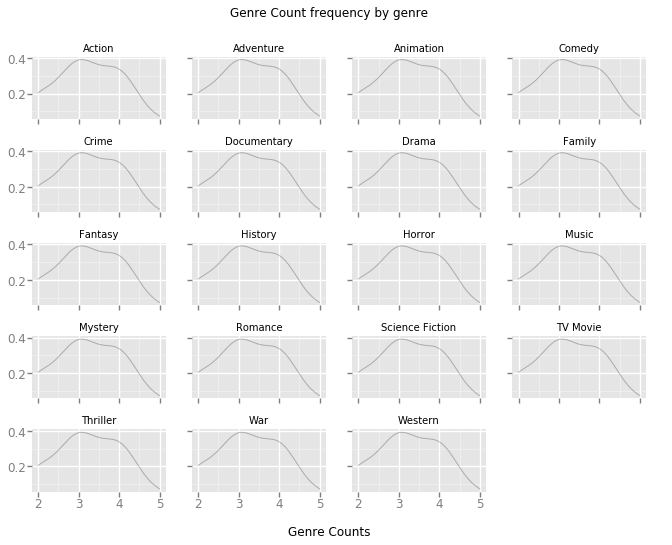

<ggplot: (290558044)>

In [67]:
ggplot(df_geared_movies, aes(x='genre_count')) +\
    geom_density(alpha=0.25) + facet_wrap("searched_genre_name") + \
    ggtitle('Genre Count frequency by genre') + xlab('Genre Counts')

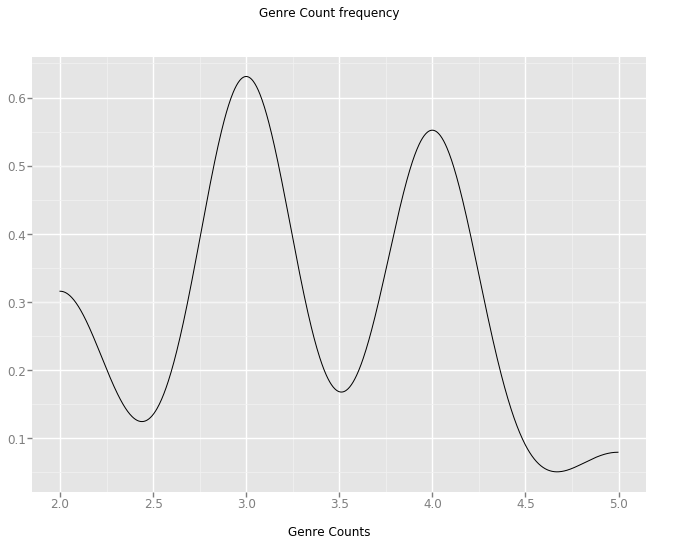

<ggplot: (-9223372036565848078)>

In [64]:
ggplot(df_geared_movies, aes(x='genre_count')) +\
    geom_density(alpha=1) + ggtitle('Genre Count frequency') + xlab('Genre Counts')

In [110]:
df_rated_movies = pandas.DataFrame(rated_movies)
df_rated_movies.tail(3)

,adult,backdrop_path,genre_count,genre_ids,id,original_language,original_title,overview,popularity,poster_path,rating,release_date,title,video,vote_average,vote_count
117,False,/qMjbMPkSCc1K19zuXNM2BgIsIRz.jpg,4,"[16, 35, 10751, 12]",14160,en,Up,Carl Fredricksen spent his entire life dreamin...,6.547214,/nk11pvocdb5zbFhX5oq5YiLPYMo.jpg,PG,2009-05-13,Up,False,7.7,5084
118,False,/8Vpw2GIBVNsLNPkp3Uq7d4lQrae.jpg,6,"[28, 12, 16, 35, 10751, 878]",262841,en,Monster Trucks,Looking for any way to get away from the life ...,6.414133,/vXaPSsCLuwydLteZbLMvP8ksXph.jpg,PG,2017-01-05,Monster Trucks,False,5.6,62
119,False,/eIOTsGg9FCVrBc4r2nXaV61JF4F.jpg,3,"[12, 18, 14]",278927,en,The Jungle Book,After a threat from the tiger Shere Khan force...,6.339589,/vOipe2myi26UDwP978hsYOrnUWC.jpg,PG,2016-04-07,The Jungle Book,False,6.6,2150


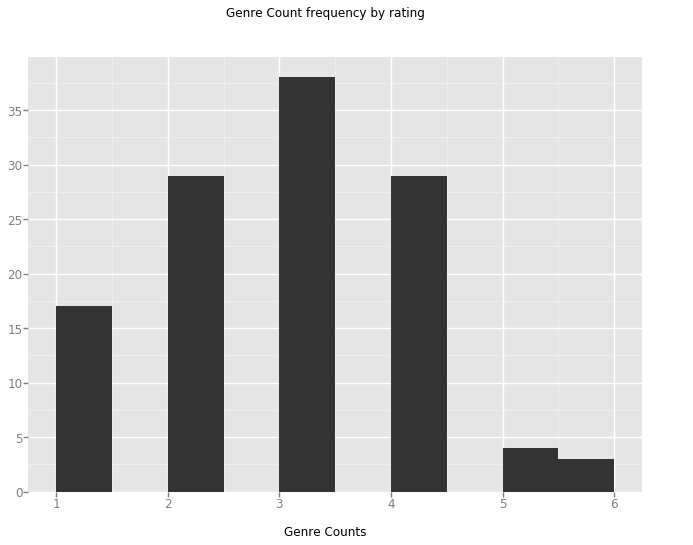

<ggplot: (291930937)>

In [77]:
ggplot(df_rated_movies, aes(x='genre_count')) +\
    geom_histogram(position = 'stack', stat = 'bin')+ ggtitle('Genre Count frequency by rating') + xlab('Genre Counts')

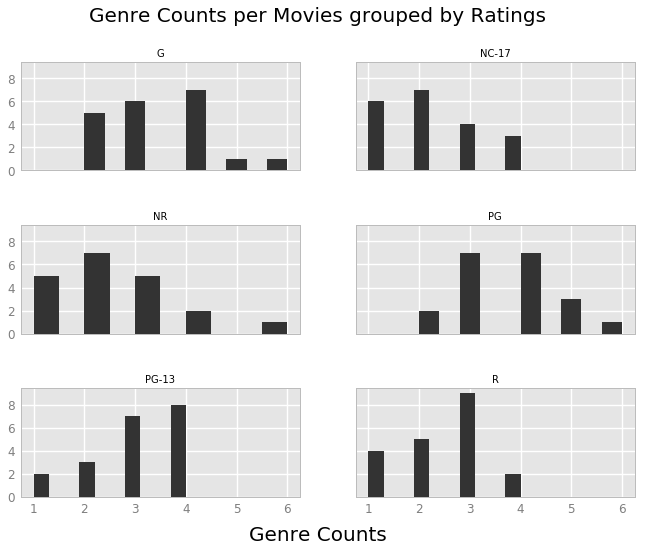

<ggplot: (-9223372036557857960)>

In [94]:
ggplot(df_rated_movies, aes(x='genre_count')) +\
    geom_histogram(position = 'stack', stat = 'bin') + facet_wrap("rating",scales='fixed') + \
    theme(title=element_text(size=20, text = 'Genre Counts per Movies grouped by Ratings'),
         axis_title_x=element_text(text='Genre Counts', size=20))

In [99]:
us_certifications
class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of 
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in 
        IPython Notebook. """
    
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)

In [100]:
table = ListTable()
table.append(us_certifications)

In [105]:
from IPython.display import HTML
from json2html import *

HTML(json2html.convert(json = us_certifications))

certification,meaning,order
G,All ages admitted. There is no content that would be objectionable to most parents. This is one of only two ratings dating back to 1968 that still exists today.,1
PG-13,"Some material may be inappropriate for children under 13. Films given this rating may contain sexual content, brief or partial nudity, some strong language and innuendo, humor, mature themes, political themes, terror and/or intense action violence. However, bloodshed is rarely present. This is the minimum rating at which drug content is present.",3
R,"Under 17 requires accompanying parent or adult guardian 21 or older. The parent/guardian is required to stay with the child under 17 through the entire movie, even if the parent gives the child/teenager permission to see the film alone. These films may contain strong profanity, graphic sexuality, nudity, strong violence, horror, gore, and strong drug use. A movie rated R for profanity often has more severe or frequent language than the PG-13 rating would permit. An R-rated movie may have more blood, gore, drug use, nudity, or graphic sexuality than a PG-13 movie would admit.",4
NC-17,"These films contain excessive graphic violence, intense or explicit sex, depraved, abhorrent behavior, explicit drug abuse, strong language, explicit nudity, or any other elements which, at present, most parents would consider too strong and therefore off-limits for viewing by their children and teens. NC-17 does not necessarily mean obscene or pornographic in the oft-accepted or legal meaning of those words.",5
NR,No rating information.,0
PG,"Some material may not be suitable for children under 10. These films may contain some mild language, crude/suggestive humor, scary moments and/or violence. No drug content is present. There are a few exceptions to this rule. A few racial insults may also be heard.",2


In [102]:
us_certifications

[{'certification': 'G',
  'meaning': 'All ages admitted. There is no content that would be objectionable to most parents. This is one of only two ratings dating back to 1968 that still exists today.',
  'order': 1},
 {'certification': 'PG-13',
  'meaning': 'Some material may be inappropriate for children under 13. Films given this rating may contain sexual content, brief or partial nudity, some strong language and innuendo, humor, mature themes, political themes, terror and/or intense action violence. However, bloodshed is rarely present. This is the minimum rating at which drug content is present.',
  'order': 3},
 {'certification': 'R',
  'meaning': 'Under 17 requires accompanying parent or adult guardian 21 or older. The parent/guardian is required to stay with the child under 17 through the entire movie, even if the parent gives the child/teenager permission to see the film alone. These films may contain strong profanity, graphic sexuality, nudity, strong violence, horror, gore, an